In [30]:
import pandas as pd
from scipy.stats import skew, kurtosis

In [31]:
df = pd.read_csv('/content/Bank-Customer-Attrition-Insights-Data.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15583480,Morgan,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15620341,Nwebube,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15613886,Trevisan,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15792916,Ositadimma,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

**What are the summary statistics (mean, median, standard deviation, skewness, and kurtosis) for key numerical variables such as balance, credit score, and transaction count?**

In [37]:
from scipy.stats import skew, kurtosis

numerical_columns = ['Balance', 'CreditScore', 'NumOfProducts', 'Age', 'Tenure', 'EstimatedSalary']


summary_stats = pd.DataFrame(columns=["Mean", "Median", "Std Dev", "Skewness", "Kurtosis"])

for col in numerical_columns:
    mean = df[col].mean()
    median = df[col].median()
    std_dev = df[col].std()
    skewness = skew(df[col])
    kurt = kurtosis(df[col])

    summary_stats.loc[col] = [mean, median, std_dev, skewness, kurt]

print(summary_stats)

                          Mean      Median       Std Dev  Skewness  Kurtosis
Balance           76485.889288   97198.540  62397.405202 -0.141088 -1.489267
CreditScore         650.528800     652.000     96.653299 -0.071596 -0.426113
NumOfProducts         1.530200       1.000      0.581654  0.745456  0.582089
Age                  38.921800      37.000     10.487806  1.011169  1.394050
Tenure                5.012800       5.000      2.892174  0.010990 -1.165243
EstimatedSalary  100090.239881  100193.915  57510.492818  0.002085 -1.181528


**What is the distribution of customers by gender, geography, and age?**

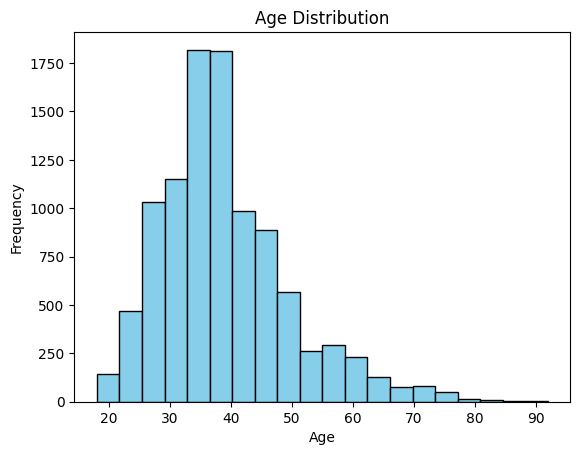

Gender
Male      5457
Female    4543
Name: count, dtype: int64
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


In [34]:
# Distribution of customers by Gender and Geography
gender_dist = df['Gender'].value_counts()
geography_dist = df['Geography'].value_counts()

# Distribution of customers by Age (Histogram)
import matplotlib.pyplot as plt

plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

print(gender_dist)
print(geography_dist)

**What are the minimum, maximum, and average transaction counts of active vs. inactive customers?**

In [35]:
# Transaction count (NumOfProducts) statistics for active vs. inactive customers
transaction_stats = df.groupby('IsActiveMember')['NumOfProducts'].agg(['min', 'max', 'mean'])
print("\nTransaction Statistics (Active vs. Inactive Customers):\n", transaction_stats)


Transaction Statistics (Active vs. Inactive Customers):
                 min  max      mean
IsActiveMember                    
0                 1    4  1.524438
1                 1    4  1.535624


**How are variables like credit score, balance, and transaction count related?**

In [36]:
# Correlation between CreditScore, Balance, and NumOfProducts
correlation_matrix = df[['CreditScore', 'Balance', 'NumOfProducts']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                CreditScore   Balance  NumOfProducts
CreditScore       1.000000  0.006268       0.012238
Balance           0.006268  1.000000      -0.304180
NumOfProducts     0.012238 -0.304180       1.000000


**What are the differences in balance and transaction activity between customers who stayed and those who churned?**

In [28]:
# Differences in balance and transaction activity between customers who stayed and churned
churn_analysis = df.groupby('Exited')[['Balance', 'NumOfProducts']].mean()
print("\nBalance & Transaction Activity (Stayed vs. Churned):\n", churn_analysis)


Balance & Transaction Activity (Stayed vs. Churned):
              Balance  NumOfProducts
Exited                             
0       72742.750663       1.544210
1       91109.476006       1.475466


**What is the probability that a customer has both a low credit score and a high balance?**

In [29]:
# Probability of low credit score & high balance
low_credit_threshold = df['CreditScore'].quantile(0.25) # Define low credit score threshold
high_balance_threshold = df['Balance'].quantile(0.75)  # High balance: Top 25%

low_credit_high_balance = df[(df['CreditScore'] <= low_credit_threshold) &
                             (df['Balance'] >= high_balance_threshold)]
probability = len(low_credit_high_balance) / len(df)
print(f"\nProbability of Low Credit Score & High Balance: {probability:.4f}")


Probability of Low Credit Score & High Balance: 0.0638
